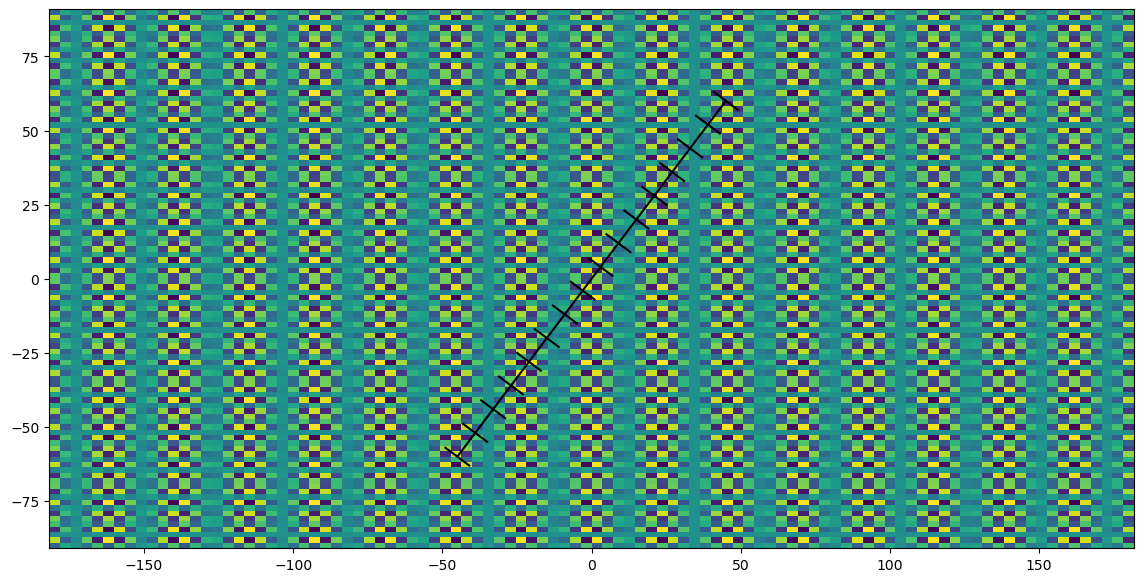

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Haversine function to compute the distance between two lat-lon points
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0e3  # Earth radius in meters
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = (np.sin(dlat / 2.0)**2 +
         np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Create a dummy pcolormesh plot
x = np.linspace(-180, 180, 100)
y = np.linspace(-90, 90, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

fig, ax = plt.subplots(figsize=(14,7))
ax.pcolormesh(X, Y, Z, shading='auto')

# Define start and end points for the ruler
lat_start, lon_start = -60, -45
lat_end, lon_end = 60, 45

# Calculate the total distance between start and end points
total_distance = haversine_distance(lat_start, lon_start, lat_end, lon_end)

# Calculate the number of ticks based on 500m intervals
num_ticks = int(total_distance / 1000000)

# Draw the ruler
ax.plot([lon_start, lon_end], [lat_start, lat_end], color='black')

# Add ticks at an interval of 500 meters
for i in range(num_ticks + 1):
    fraction = i / num_ticks
    lat_tick = lat_start + fraction * (lat_end - lat_start)
    lon_tick = lon_start + fraction * (lon_end - lon_start)
    # Calculate a small perpendicular offset for the tick marks
    offset_lat = 0.5 * (lon_end - lon_start) / num_ticks
    offset_lon = -0.5 * (lat_end - lat_start) / num_ticks
    ax.plot([lon_tick + offset_lon, lon_tick - offset_lon], [lat_tick + offset_lat, lat_tick - offset_lat], color='black', linewidth=1.5)

plt.show()
